## Datan analysointi K2020_2 - Tehtävät kerta 5

Palauta Optiman palautuslaatikkoon viimeistään su 15.3. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

**Opiskelijan nimi:**

## 1. Autoja

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/golf.zip on tietoja Trafin tiedoissa olevista VW Golf  -autoista.

Lue tiedot DataFrameen ja erota kayttoonottopvm-kentästä käyttöönottovuosi.

Tee sitten
* histogrammi käyttöönottovuodesta
* histogrammi matkamittarin lukemasta, rajaa pois yli 500 000 kilometrin lukemat
* jointplot käyttöönottovuosi<->CO2-päästöt 
* jointplot omamassa<->suurinNettoteho (rajaa selvästi muista poikkeavat omamassa-arvot pois)
* violinplot käyttöönottovuodesta käyttövoiman (yksittaisKayttovoima) mukaan. Ota mukaan vain käyttövoiman arvot 1.0 = bensiini, 2.0 = diesel

C:\Users\Sami\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


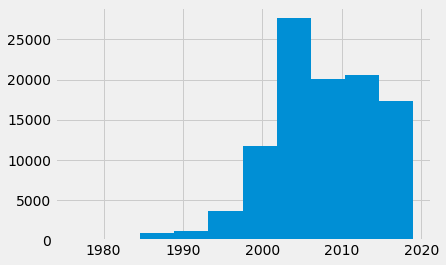

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/golf.zip')
df['kayttoonottovuosi'] = df['kayttoonottopvm'].astype(str).str[0:4].astype(int)
plt.hist('kayttoonottovuosi', data=df)
plt.show()

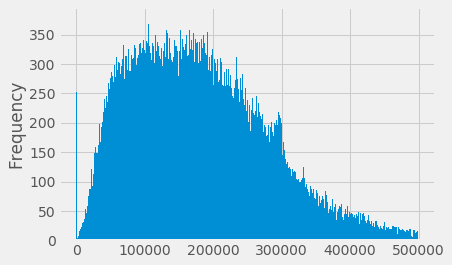

In [58]:
df['matkamittarilukema'].plot.hist(bins=np.arange(0,500000,1000))
plt.show()

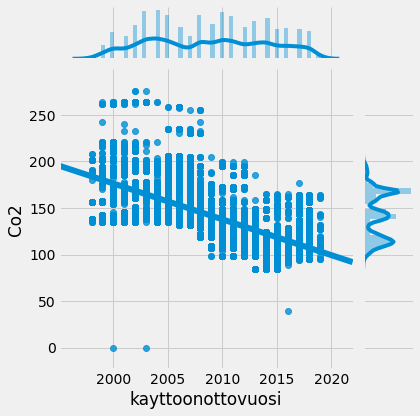

In [5]:
import seaborn as sns
sns.jointplot('kayttoonottovuosi','Co2', data=df, kind='reg')
plt.show()

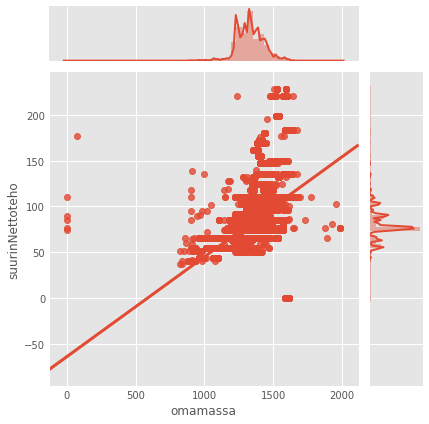

In [82]:
plt.style.use('ggplot')
sns.jointplot('omamassa','suurinNettoteho', data=df, kind='reg', dropna=True)
plt.show()


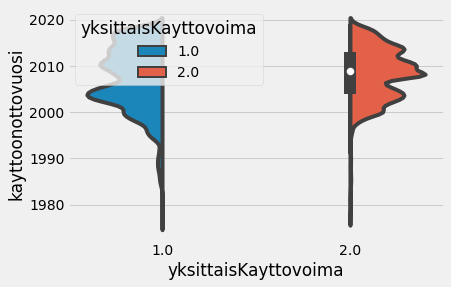

In [9]:
#violinplot käyttöönottovuodesta käyttövoiman (yksittaisKayttovoima) mukaan.
#Ota mukaan vain käyttövoiman arvot 1.0 = bensiini, 2.0 = diesel
df2 = df[(df['yksittaisKayttovoima']==1.0) | (df['yksittaisKayttovoima']==2.0)]
sns.violinplot(y='kayttoonottovuosi', x='yksittaisKayttovoima', hue='yksittaisKayttovoima', data=df2, split=True)
plt.show()

## 2. Muotoilut
Alla on annettu kaavion luontikoodi (käyttäen np-taulukoita). Tee kaaviosta yksityiskohtaisesti alla olevan mallin mukainen. Tutki [matplotlibin speksistä](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot), miten kaavion osia muotoillaan.  

![malli](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/kaavio2.png)

leikkauspiste -teksti on manuaalisesti asettetu, ei siis tarvitse erikseen laskea leikkauspistettä


C:\Users\Sami\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


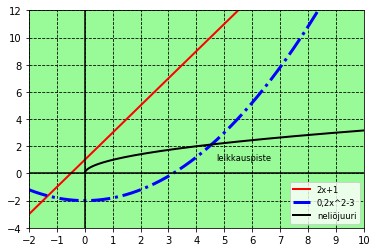

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


x = np.linspace(-2,10,1000)
y1 =  2*x +1
y2 = 0.2*x**2-2
y3 = (x)**0.5
fig, ax = plt.subplots(frameon=False)


plt.axes(facecolor='palegreen')
plt.plot(x, y1,'r-', label='2x+1', linewidth=2)
plt.plot(x, y2, 'b-.',label='0,2x^2-3',linewidth=3)
plt.plot(x, y3, 'k', label='neliöjuuri',linewidth=2)
plt.grid(which='major', axis='both', linestyle='--', color='k')
plt.axis([-2,10,-4,12])
plt.axhline(color='k')
plt.axvline(color='k')
plt.legend(loc='lower right', fontsize='small')
xticks = [x for x in range(-2,11,1)]
plt.xticks(xticks)
plt.annotate('leikkauspiste',(4.7,1),fontsize='small')


plt.show()

## 3. Liikennetietoja
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/lam_raw.csv on yhden päivän tietoja eräältä automaattiselta liikennemittausasemalta ([LAM](https://vayla.fi/avoindata/tietoaineistot/lam-tiedot)). Erotin on puolipiste, mutta datatiedostossa ei ole otsikkoriviä. Kentät ovat järjestyksessä:  

* pistetunnus
* vuosi
* päivän järjestysnumero
* tunti
* minuutti
* sekunti
* sadasosasekunti
* pituus (m)
* kaista
* suunta
* ajoneuvoluokka
* nopeus (km/h)
* faulty (0 = validi havainto, 1=virheellinen havainto)
* kokonaisaika (tekninen)
* aikaväli (tekninen)
* jonoalku (tekninen)


Lue tiedot DataFrameen ja poista virheelliset havainnot.
Tutki sitten sopivien kaavioiden avulla suunnan, ajoneuvoluokan ja kellonajan (esim tunti) vaikutusta nopeusjakaumaan.


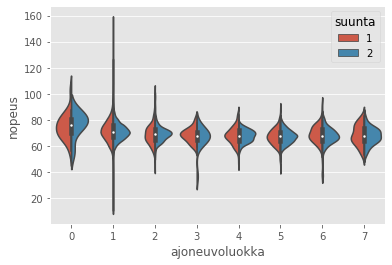

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/lam_raw.csv', sep=';',
                 names=['pistetunnus','vuosi','päivä','tunti','minuutti','sekunti',
                         'sadasosasekunti','pituus','kaista','suunta','ajoneuvoluokka',
                         'nopeus','faulty',	'kokonaisaika',	'aikaväli', 'jonoalku'])
# sns.swarmplot(x='suunta', y='nopeus',hue='ajoneuvoluokka', data=df)
sns.violinplot(x='ajoneuvoluokka', y='nopeus',hue='suunta', data=df, split=True)
plt.show()


# plt.plot(df['suunta'].dropna(),df['nopeus'].dropna())
# ,'ajoneuvoluokka','tunti'])



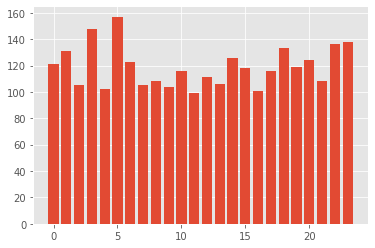

In [4]:
plt.bar('tunti','nopeus',data=df)
plt.show()


In [ ]:
df2 = df[(df['ajoneuvoluokka']==0) | (df['ajoneuvoluokka']==1)]
sns.swarmplot('suunta','nopeus',data=df2)
plt.show()

## 4. Sää

Lue tiedosto https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/saa_jkl20200229.csv DataFrameen ja tee 
subplotia käyttäen 4 kaaviota (2 riviä, 2 saraketta) samaan kuvioon (figure):
* lumensyvydet tammi-helmikuun 2018, 2019 ja 2020 päiviltä samaan kaavioon. 
Korvaa ensin lumensyvyyden arvot -1 nollalla. Laske myös monesko päivä vuodesta on kyseessä ja laita tämä vaaka-akselille.
* laske kuinka monta cm enemmän/vähemmän lumensyvyys on ollut 2020 kuin 2019 tammi-helmikuun aikana, 
ja tee tästä erosta viivakaavio, vaaka-akselilla päivä
* laske kuinka paljon lumensyvyys on muuttunut edellisen päivän lukemasta ja tee näistä muutoksista 
histogrammi vuoden 2020 tammi-helmikuun päiviltä
* regplot ilman lämpötilasta ja päivittäisistä lumensyvyyden muutoksista vuoden 2020 tammi-helmikuulta


Laita kuvion kooksi 14 x 14 tuumaa

Malli (ei tarvitse olla täsmälleen samannäköinen):  
![malli4](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/lumet2.png)


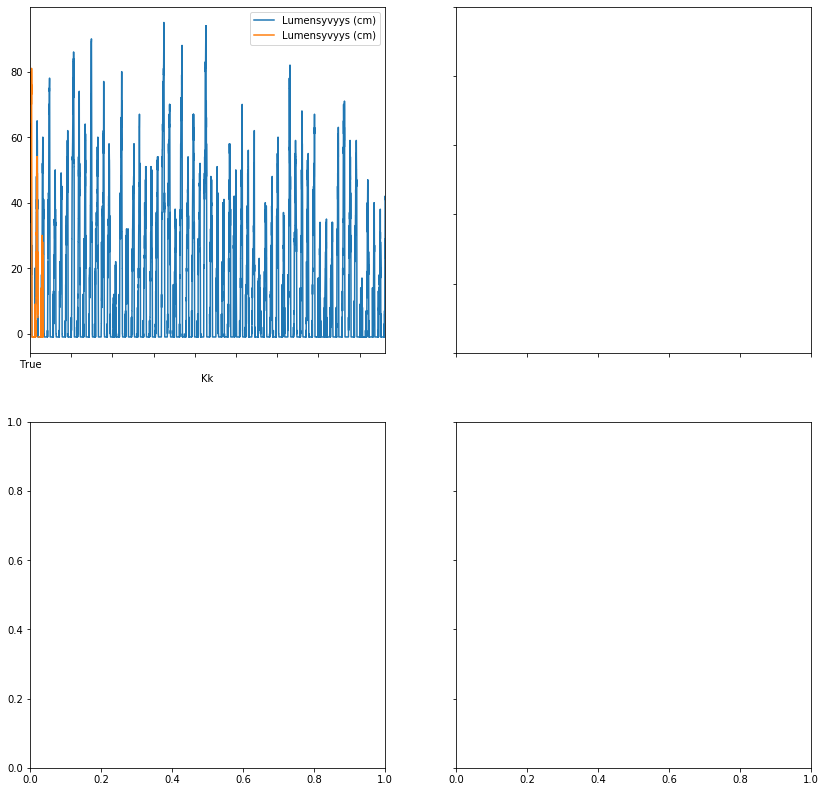

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/saa_jkl20200229.csv')

df['Kk'] = df['Kk'].isin([1,2]).dropna()
df['Vuosi'] = df['Vuosi'].isin(['2018','2019','2020']).dropna()

fig1, ax1 = plt.subplots(2,2,'all','all',frameon=False,figsize=(14, 14))
ax1 = plt.subplot(2,2,1)
xticks=[x for x in range(0,60,1)]
plt.xticks=(xticks)
df.groupby('Vuosi').plot('Kk','Lumensyvyys (cm)',ax=ax1)

# df.groupby['Vuosi'].plot('Kk','Lumensyvyys (cm)',ax=ax1)
ax2 = plt.subplot(2,2,2)


plt.show()


## 5. Variaatiokerroin

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/kone5.csv on erään koneen toiminnasta mittaustulosksia 10 sekunnin välein.

Laske jokaiselle alkavalle tunnille mittaustuloksista `variaatiokerroin` (COV), joka määritellään **keskihajonta/keskiarvo** (siis kyseisen tunnin mittaustulosten keskihajonta ja keskiarvo, pura ensin tuntitieto päivä- ja aikasarakkeesta).

Tee sitten näistä COV-lukemista oheinen "kertymäkaavio", jossa vaaka-akselilla on luvut 0-100 kuvaamassa kuinka monta % COV-arvoista on alle tämän kohdan arvon, ja pystyakselilla COV-arvot.


Rajaa kaavion y-akseli välille 0 ... 0,1


Värjää pienin 30 % vihreällä ja suurin 15 % punaisella.


Malli:  
![malli5](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/malli5.png)

Siis esim. kohdassa 60 kuvaaja on korkeudella n. 0,005 tarkoittaen, että 60 % tunneittaisista COV-arvoista on alle n. 0,005  
![malli5b](https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/malli5b.png)
(kaavioon ei näitä 60->0.005 -viivoja tarvitse piirtää)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta5/kone5.csv',sep=',')
df['hour']=df['time'].str.split[':'].str[0].astype(int)

df.cov()


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('kone5.csv')
df['tunti'] = pd.DatetimeIndex(df['time']).hour

df.groupby('tunti').cov()


# En saanut edes tätä ajettua jostain syystä! En tiedä onko vika labranetissä vai missä, mutta en saa ulos mitään tulosta. 

AttributeError: 'Int64Index' object has no attribute 'cov'